### Example Notebook of all SSA / ODE methods

In [1]:
#setup, lets load a large gene (HUMINSR) ~1700bp
import numpy as np
import os

os.chdir('..')

from rss import rSNAPsim
from rss import ProbeVectorFactory as pvf
from rss import PropensityFactory as pff
from rss import TranslationSolvers as tss
import matplotlib.pyplot as plt
import time
from rss import IntensityAnalyses as ia



plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False




os.chdir('./interactive_notebooks')

rsim = rSNAPsim()
rsim.open_seq_file('../gene_files/HUMINSR.gb')

poi = rsim.proteins['1'][0]  #protein object

solver = tss()  #solver class
solver.protein=poi

t = np.linspace(0,500,501)


importing C++ models
c++ models loaded successfully


ImportError: attempted relative import with no known parent package

In [2]:
tau,means,var = solver.solve_ballistic_model(poi.ki,poi.ke)
print("ballistic ribosome mean: %f" % means[0])
print("ballistic intensity mean: %f" % (means[0]*10) )

ballistic ribosome mean: 4.385248
ballistic intensity mean: 43.852476


C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:6381: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


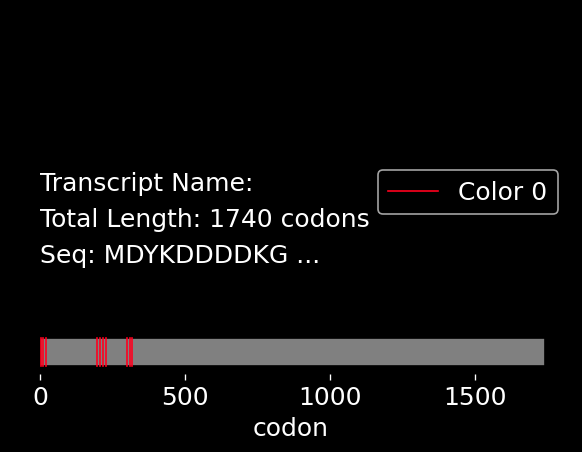

In [3]:
poi.visualize_probe()

Low memory, no recording: solved in 0.962217 seconds


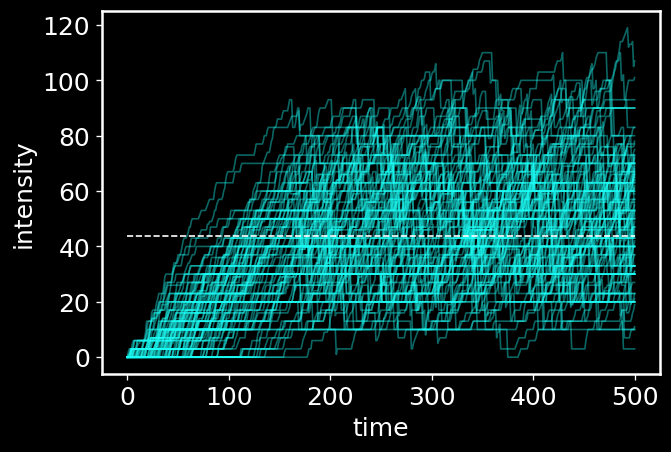

In [9]:

#with recording and low memory
sttime = time.time()
ssa_soln = solver.solve_ssa(poi.kelong,t,ki=.033,n_traj=100)
solvetime = time.time()-sttime


plt.plot(ssa_soln.intensity_vec[0],color='#1cfff7',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)

plt.plot([0,500],[means[0]*10,means[0]*10],'w--')



Text(0.5, 1.0, 'Autocorrelation')

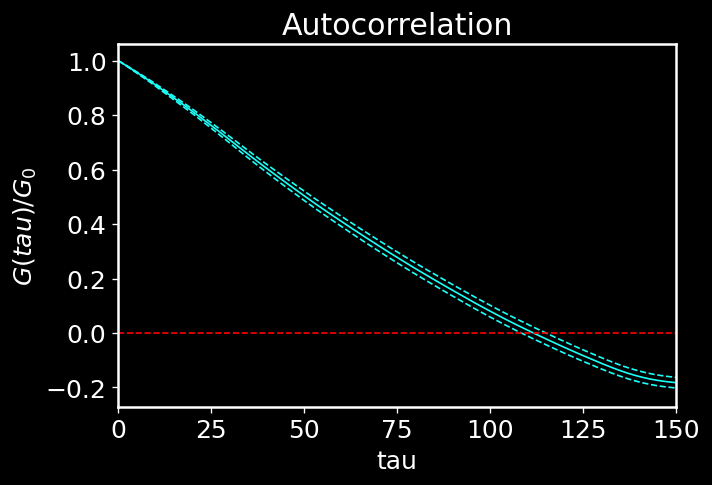

In [11]:
acov,err_acov = ia().get_autocov(ssa_soln.intensity_vec,norm='ind')

acc,err_acc = ia().get_autocorr(acov)
n_traj = acc.shape[-1]

plt.plot(np.mean(acc[0],axis=1),color='#1cfff7');
plt.plot(np.mean(acc[0],axis=1) - err_acc[0],'--',color='#1cfff7');
plt.plot(np.mean(acc[0],axis=1)+ err_acc[0],'--',color='#1cfff7');
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,150])
plt.ylabel('$G(tau)/G_0$')
plt.xlabel('tau')
plt.title('Autocorrelation')


Low memory, w/ recording: solved in 1.222275 seconds


Text(0.5, 1.0, 'Collisions per location over all 100 Trajectories')

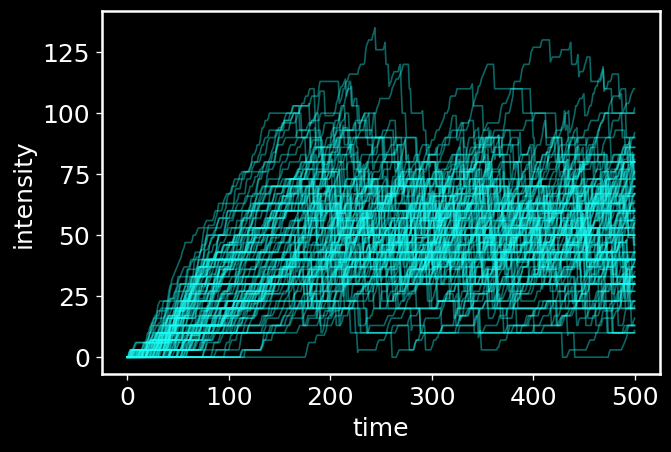

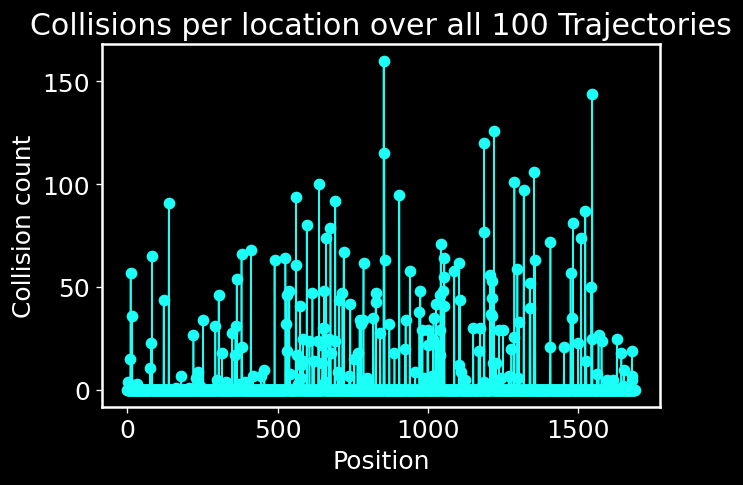

In [12]:
#Default settings, no stats recording and low memory
sttime = time.time()
ssa_soln = solver.solve_ssa(poi.kelong,t,ki=.033,n_traj=100,record_stats=True )
solvetime = time.time()-sttime

plt.plot(ssa_soln.intensity_vec[0],color='#1cfff7',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, w/ recording: solved in %f seconds" % solvetime)

plt.figure()
plt.plot(ssa_soln.collisions,'-o',color='#1cfff7')
plt.xlabel('Position')
plt.ylabel('Collision count')
plt.title('Collisions per location over all 100 Trajectories')


full memory, with recording: solved in 1.104258 seconds


AttributeError: 'SSA_Soln' object has no attribute 'solutions'

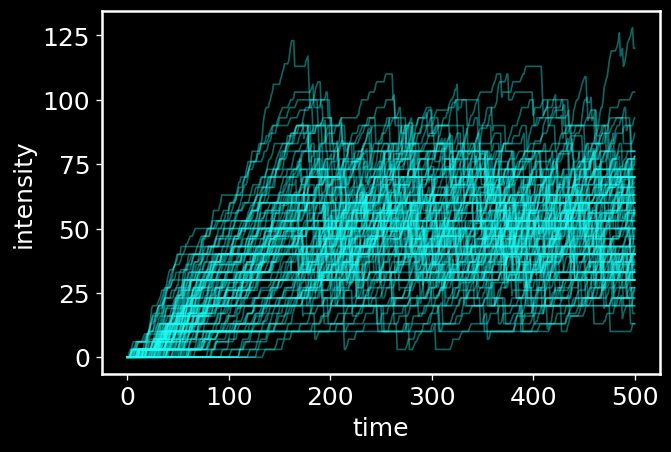

<Figure size 720x480 with 0 Axes>

In [14]:
#full solution, returns the ribosome positions
sttime = time.time()
ssa_soln = solver.solve_ssa(poi.kelong,t,n_traj=100,ki=.033,record_stats=True,low_memory=False )
solvetime = time.time()-sttime

plt.plot(ssa_soln.intensity_vec[0],color='#1cfff7',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
print("full memory, with recording: solved in %f seconds" % solvetime)


plt.figure()
plt.plot(ssa_soln.solutions[0].T,'#1cfff7')
plt.plot(ssa_soln.solutions[1].T,'violet')
plt.ylabel('Position')
plt.xlabel('Time')
plt.title('2 Trajectories Ribosome posistion over time')



### Intellegent Binning (focuses resolution on probe locations)

C:\Users\willi\Anaconda2\envs\newpy36clone\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 0, 'bin')

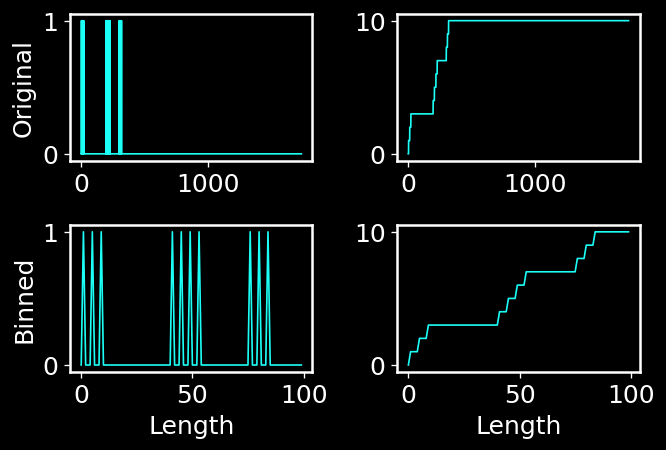

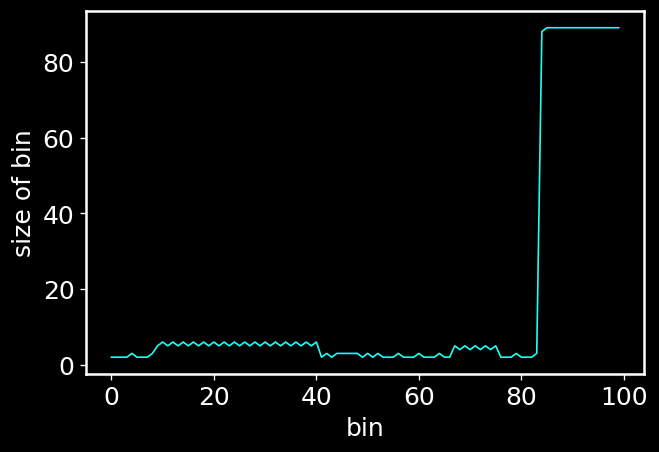

In [16]:
inds = pff.intellegent_bin(np.atleast_2d(poi.probe_loc),100)   
binned_probe_locations,binned_probe_vector = pvf.bin_probe_vecs(poi.probe_loc,inds)
kelong_bin = pff.bin_k(poi.kelong, inds)    #

fig,ax = plt.subplots(2,2)

ax[0,0].plot(poi.probe_loc[0],'-',color='#1cfff7')
ax[0,0].set_ylabel('Original')

ax[1,0].plot(binned_probe_locations[0],'-',color='#1cfff7')
ax[1,0].set_xlabel('Length')
ax[1,0].set_ylabel('Binned')

ax[0,1].plot(poi.probe_vec[0],'-',color='#1cfff7')
ax[1,1].plot(binned_probe_vector[0],'-',color='#1cfff7')
ax[1,1].set_xlabel('Length')
plt.tight_layout()
fig.show()


plt.figure()
plt.plot(inds[1:] - inds[:-1],color='#1cfff7')
plt.ylabel('size of bin')
plt.xlabel('bin')


### Even Binning (bin the probe evenly as possible)

C:\Users\willi\Anaconda2\envs\newpy36clone\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


average size of bin: 17.400000


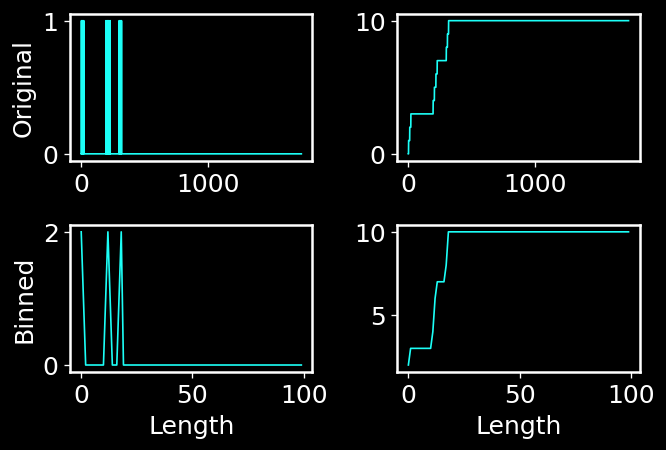

In [17]:
inds = pff.even_bin(poi.probe_loc.shape[1],100)   
binned_probe_locations,binned_probe_vector = pvf.bin_probe_vecs(poi.probe_loc,inds)
kelong_bin = pff.bin_k(poi.kelong, inds)    #

fig,ax = plt.subplots(2,2)

ax[0,0].plot(poi.probe_loc[0],'-',color='#1cfff7')
ax[0,0].set_ylabel('Original')
ax[1,0].plot(binned_probe_locations[0],'-',color='#1cfff7')
ax[1,0].set_xlabel('Length')
ax[1,0].set_ylabel('Binned')


ax[0,1].plot(poi.probe_vec[0],'-',color='#1cfff7')
ax[1,1].plot(binned_probe_vector[0],'-',color='#1cfff7')
ax[1,1].set_xlabel('Length')
plt.tight_layout()
fig.show()

print("average size of bin: %f" % np.mean(inds[1:] - inds[:-1]))



### Binned SSA

average dwell time w/bins: 
164.68772434917827
average dwell time no bins: 
164.68772434917824
Low memory, no recording: solved in 0.231051 seconds


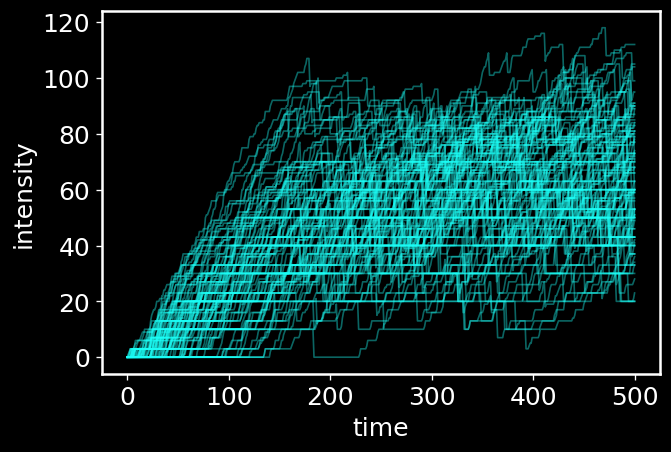

In [19]:
#with recording and low memory


inds = pff.intellegent_bin(np.atleast_2d(poi.probe_loc),200)   
binned_probe_locations,binned_probe_vector = pvf.bin_probe_vecs(poi.probe_loc,inds)
kelong_bin = pff.bin_k(poi.kelong, inds)    #

print('average dwell time w/bins: ')
print(np.sum(1/kelong_bin))
print('average dwell time no bins: ')
print(np.sum(1/np.array(poi.kelong)))

sttime = time.time()
ssa_soln = solver.solve_ssa(kelong_bin.tolist(),t,ki=.033,n_traj=100, probe_vec =binned_probe_vector, probe_loc = binned_probe_locations )
solvetime = time.time()-sttime

plt.plot(ssa_soln.intensity_vec[0],color='#1cfff7',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)


low memory, with leaky probes: solved in 1.260284 seconds


Text(0.5, 1.0, 'Cyan: kprobe=.8, Violet: kprobe = .2')

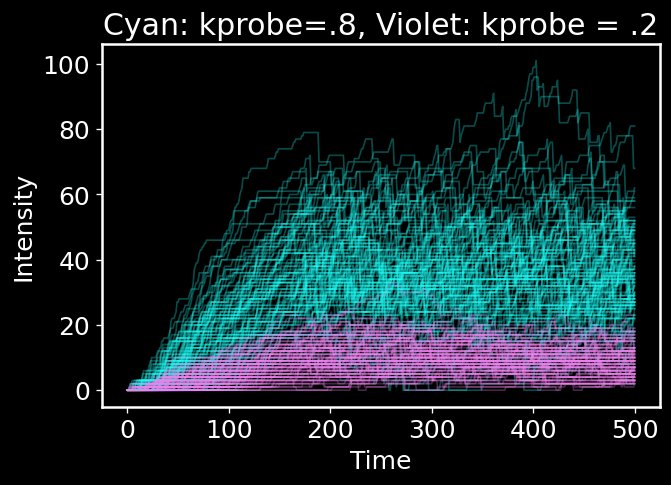

In [21]:
#full solution, returns the ribosome positions
sttime = time.time()
ssa_soln = solver.solve_ssa(poi.kelong,t,ki=.033,n_traj=100,leaky_probes=True, kprobe=np.array([.8]),low_memory=True,record_stats=True)
solvetime = time.time()-sttime


print("low memory, with leaky probes: solved in %f seconds" % solvetime)

plt.figure()
plt.plot(ssa_soln.intensity_vec[0],'#1cfff7',alpha=.3)

ssa_soln = solver.solve_ssa(poi.kelong,t,ki=.033,n_traj=100,leaky_probes=True, kprobe=np.array([.2]),low_memory=True,record_stats=True)


plt.plot(ssa_soln.intensity_vec[0],'violet',alpha=.3)
plt.ylabel('Intensity')
plt.xlabel('Time')
plt.title('Cyan: kprobe=.8, Violet: kprobe = .2')



In [ ]:
#Bursting

sttime = time.time()
ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=100,kon=.5,koff=.5,bursting=True)
solvetime = time.time()-sttime


print("low memory, with leaky probes: solved in %f seconds" % solvetime)

plt.figure()
plt.plot(ssa_soln.intensity_vec[0],'#1cfff7',alpha=.3)

ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=100,kon=.5,koff=5,bursting=True)

plt.plot(ssa_soln.intensity_vec[0],'violet',alpha=.3)
plt.ylabel('Intensity')
plt.xlabel('Time')
plt.title('Green: gamma = 1, Violet: gamma = .1')


In [ ]:
#Bursting

sttime = time.time()
solver.cython_available = False
ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=100)
solvetime = time.time()-sttime


print("low memory, with leaky probes: solved in %f seconds" % solvetime)

plt.figure()
plt.plot(ssa_soln.intensity_vec[0],'#1cfff7',alpha=.3)

ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=100)

plt.plot(ssa_soln.intensity_vec[0],'violet',alpha=.3)
plt.ylabel('Intensity')
plt.xlabel('Time')
plt.title('Green: gamma = 1, Violet: gamma = .1')

### ODE solutions

In [ ]:
## this should take about 40 seconds
sttime = time.time()
x0 = np.zeros((len(poi.kelong),1))
ode_soln = tss().solve_ode(poi.kelong,   t, x0, .033,poi.probe_loc,corr=False)
solvetime = time.time()-sttime
#with recording and low memory




ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=30)


plt.plot(ssa_soln.intensity_vec[0],color='#1cfff7',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
plt.plot(ode_soln.mu_It.T,'w',lw=5)
print("Full ODE solution: solved in %f seconds" % solvetime)

In [ ]:
plt.plot(ssa_soln.intensity_vec[0],color='darkgray',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
plt.plot(ode_soln.mu_It.T,'#1cfff7',lw=5)
print("Full ODE solution: solved in %f seconds" % solvetime)

In [ ]:

# How about we bin it instead?
inds = pff.intellegent_bin(np.atleast_2d(poi.probe_loc),100)
bpl,bpv = pvf.bin_probe_vecs(poi.probe_loc,inds)
k_bin = pff.bin_k(poi.kelong, inds)
x0 = np.zeros((k_bin.shape[0],1))

sttime = time.time()
ode_soln_bin = tss().solve_ode(k_bin,   t, x0, .033, bpl,corr=True)
solvetime = time.time()-sttime


ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=30)


plt.plot(ssa_soln.intensity_vec[0],color='seagreen',alpha=.4)
plt.xlabel('time')
plt.ylabel('intensity')
print("100 bin ODE solution: solved in %f seconds" % solvetime)

plt.plot(ode_soln_bin.mu_It.T,'k',lw=5)
plt.plot([0,500],[means[0]*10,means[0]*10], 'r--',lw=1)
# Much faster!

In [ ]:
plt.plot(ode_soln_bin.intensity_acc_norm)
ode_soln_bin.__dict__.keys()

## ODE solution stats

In [ ]:
## Other stuff from the ODE solution

print( 'Average intensity at steady state: %f'% ode_soln.mu_I_ss)
print( 'Variance of  intensity at steady state: %f'% ode_soln.var_I_ss)

# average ribosomes at each location
plt.plot(ode_soln.mu_state_ss,'.',color='#1cfff7')
plt.xlabel('Transcript location (codon)')
plt.ylabel('Average ribosome occupation')


def movmean(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


plt.plot(movmean(ode_soln.mu_state_ss,n=15),'.',color='violet')
plt.xlabel('Transcript location (codon)')
plt.ylabel('Probability of ribosome occupation')

plt.legend(['full','movmean'])

## vs the binned solution

Note how the resolution is binned towards the probe, and the non probe region was binned into about 15 bins and thus the ribosomal occupancy in those larger bins is longer.

In [ ]:
print( 'Average intensity at steady state: %f'% ode_soln_bin.mu_I_ss)
print( 'Variance of  intensity at steady state: %f'% ode_soln_bin.var_I_ss)

# average ribosomes at each location
plt.plot(ode_soln_bin.mu_state_ss,'.',color='#1cfff7')
plt.xlabel('Transcript location (bin)')
plt.ylabel('Average ribosome occupation')
plt.plot(movmean(ode_soln_bin.mu_state_ss,n=5),'-',color='violet')
plt.xlabel('Transcript location (codon)')
plt.ylabel('Average ribosome occupation')


In [ ]:
# Comparing the Intensity solutions from each


plt.figure()
plt.plot(ode_soln_bin.mu_It.T,'-',color = 'violet',lw=2)
plt.plot(ode_soln.mu_It.T,'--',color ='#1cfff7',lw=2)
plt.ylabel('intensity')
plt.xlabel('time')
plt.legend(['bin','full'])